In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Conv1D
from keras import backend as k


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
import tensorflow as tf

In [6]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [7]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3,3), strides= (1,1) ,activation='relu')(inpx)
layer2 = MaxPooling2D(pool_size=(2, 2),strides=(2,2))(layer1)
layer3 = Conv2D(32, (3, 3), strides=(1,1), padding= 'same', activation='relu')(layer2)
layer4 = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(layer3)
layer6 = Flatten()(layer4)
layer7 = Dense(500, activation='relu')(layer6)
layer8 = Dense(10, activation='softmax')(layer7)


In [8]:
no_epoch= 10

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

In [9]:
model = Model([inpx], layer8)
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

hist= model.fit(x_train, y_train, epochs=no_epoch,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1198 - accuracy: 0.9629 - val_loss: 0.0494 - val_accuracy: 0.9850
Epoch 2/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0348 - val_accuracy: 0.9903
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 4/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0269 - val_accuracy: 0.9937
Epoch 5/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0433 - val_accuracy: 0.9905
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0373 - val_accuracy: 0.9910
Epoch 7/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0623 -

In [10]:
no= 2

In [11]:
train_loss= hist.history['loss']
train_acc= hist.history['accuracy']


In [12]:
val_loss=hist.history['val_loss']
val_acc=hist.history['val_accuracy']

In [13]:
import matplotlib.pyplot as plt

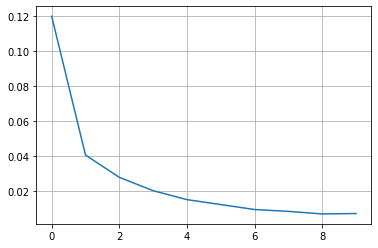

In [14]:
plt.plot(train_loss)
plt.grid()

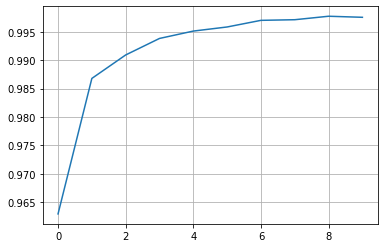

In [15]:
plt.plot(train_acc)
plt.grid()

Text(0.5, 1.0, 'validation accuracy')

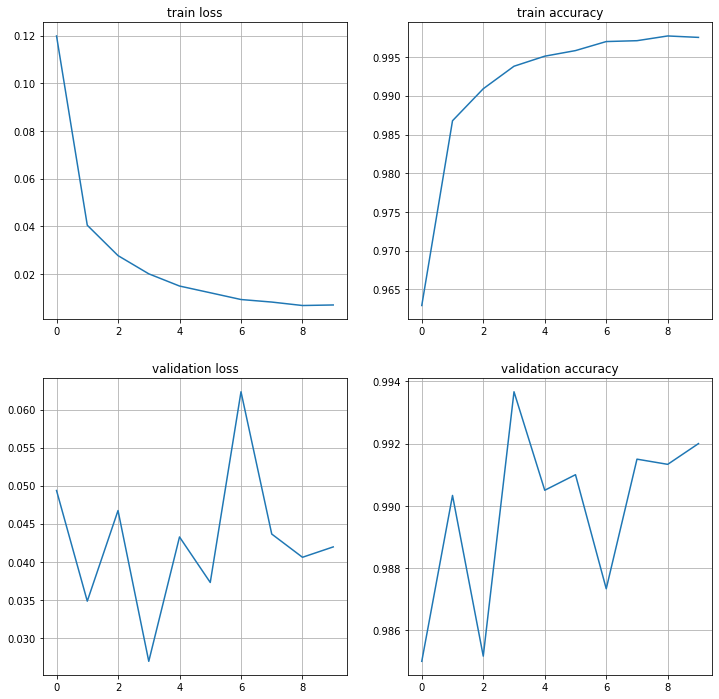

In [26]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(train_loss)
plt.grid()
ax1.set_title('train loss')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(train_acc)
plt.grid()
ax2.set_title('train accuracy')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(val_loss)
plt.grid()
ax3.set_title('validation loss')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(val_acc)
plt.grid()
ax4.set_title('validation accuracy')

In [17]:
score = model.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0449 - accuracy: 0.9903
loss= 0.04488752782344818
accuracy= 0.9902999997138977


In [37]:
model.predict(x_test[0:5])

array([[1.72880373e-12, 1.14462351e-09, 4.26035834e-13, 2.98681746e-10,
        5.94918967e-18, 7.20372214e-15, 7.90983612e-16, 1.00000000e+00,
        1.03077959e-15, 3.78586607e-10],
       [2.93745812e-16, 1.97157258e-18, 1.00000000e+00, 1.61726375e-30,
        3.35739933e-22, 1.86354011e-31, 6.86434773e-17, 1.75762028e-23,
        4.04541862e-26, 2.00832337e-22],
       [2.81891416e-12, 1.00000000e+00, 1.59314159e-11, 5.45455510e-19,
        3.26163696e-09, 2.29319948e-12, 4.04941192e-10, 1.87100724e-10,
        2.77023057e-11, 1.68019597e-13],
       [1.00000000e+00, 4.19338934e-16, 1.11256372e-14, 1.08204840e-18,
        4.49725195e-17, 3.42975717e-17, 2.75233950e-11, 3.83738578e-15,
        1.29645863e-14, 2.58080666e-13],
       [3.67161805e-15, 1.81641421e-12, 1.49780015e-11, 3.81468484e-18,
        1.00000000e+00, 1.01328314e-10, 6.72012359e-13, 9.52241411e-12,
        7.85180081e-12, 4.99462303e-08]], dtype=float32)

In [38]:
predictions= model.predict(x_test)

In [39]:
predictions

array([[1.7288037e-12, 1.1446235e-09, 4.2603583e-13, ..., 1.0000000e+00,
        1.0307796e-15, 3.7858661e-10],
       [2.9374581e-16, 1.9715726e-18, 1.0000000e+00, ..., 1.7576203e-23,
        4.0454186e-26, 2.0083234e-22],
       [2.8189142e-12, 1.0000000e+00, 1.5931416e-11, ..., 1.8710072e-10,
        2.7702306e-11, 1.6801960e-13],
       ...,
       [9.7295643e-23, 1.8913871e-14, 2.3860306e-18, ..., 7.3136967e-17,
        1.6596738e-10, 2.0922473e-16],
       [2.8680265e-13, 3.9809505e-20, 4.8120419e-22, ..., 9.9440328e-18,
        5.6495027e-11, 1.7115881e-16],
       [3.4901838e-11, 7.9276588e-16, 1.7172517e-16, ..., 6.4062942e-22,
        8.5962336e-17, 1.1709728e-19]], dtype=float32)

In [42]:
import numpy

Text(0.5, 1.0, 'Predicted: 5, Actual: [[[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]]\n\n [[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]\n  [0.        ]]\n\n [[0.        ]\n  [0.        ]\n  [0.        ]\n  [0.       

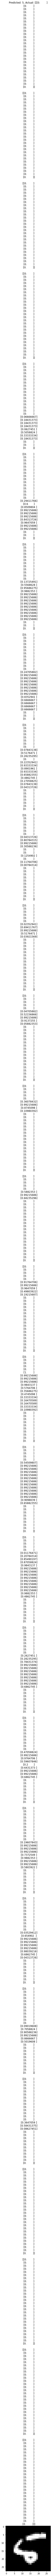

In [45]:
plt.imshow(np.reshape(x_test[8], (28,28)), cmap=plt.cm.gray)
plt.title('Predicted: {}, Actual: {}'.format(numpy.argmax(predictions[8]), x_test[8]))